In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pds

## Question 1

Replicate the graph of the three dimensional Lorentz attractor, but plot three solutions on the samer graph that have starting points no more than 0.1 away from each other.

In [2]:
def dx(x,y,z,s=10):
    return s*(y-x)
def dy(x,y,z,r=28):
    return r*x-y-x*z
def dz(x,y,z,b=8/3):
    return -b*z+x*y


def ODESolve3d(dx,dy,dz,x0,y0,z0,dt,T):
    steps = int(T//dt)
    
    X = np.ones(steps+1)
    Y = np.ones(steps+1)
    Z = np.ones(steps+1)
    
    X[0] = x0
    Y[0] = y0
    Z[0] = z0
    
    for step in range(0,steps):
        X[step+1] = X[step] + dx(X[step],Y[step],Z[step])*dt
        Y[step+1] = Y[step] + dy(X[step],Y[step],Z[step])*dt
        Z[step+1] = Z[step] + dz(X[step],Y[step],Z[step])*dt
        
    return X, Y, Z

In [3]:
dt=1e-3
T=100

X,Y,Z = ODESolve3d(dx,dy,dz,1,1,1,dt,T)

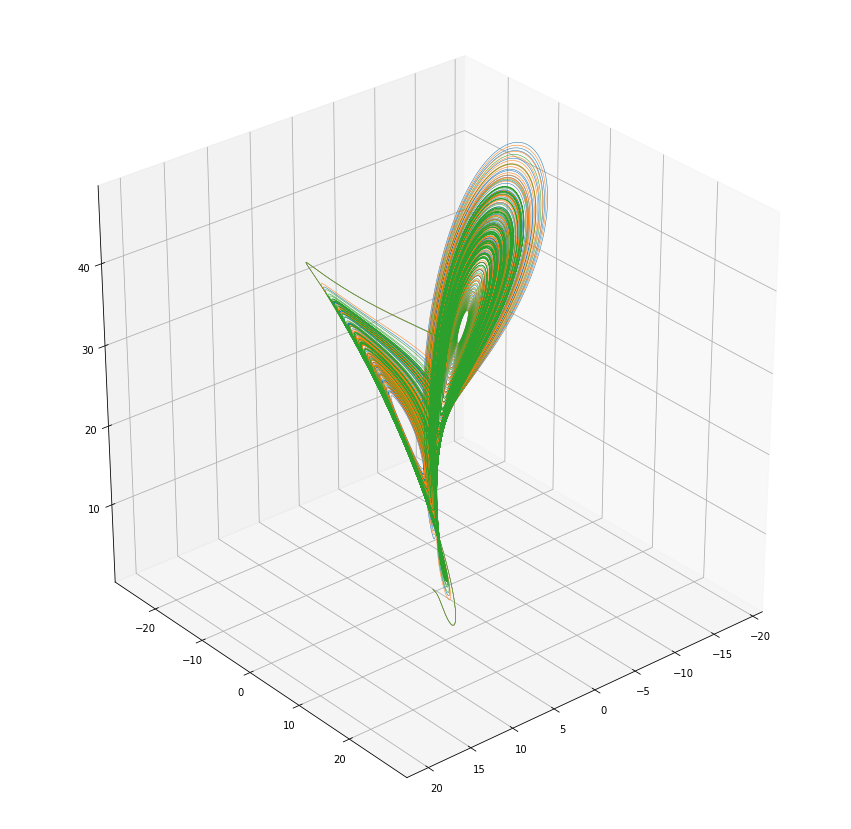

In [4]:
fig=plt.figure(figsize=(15,15))
ax=plt.axes(projection="3d")
ax.plot3D(X,Y,Z,linewidth=0.5)
X,Y,Z = ODESolve3d(dx,dy,dz,X[0]+.05,Y[0]+.05,Z[0]+.05,dt,T)
ax.plot3D(X,Y,Z,linewidth=0.5)
X,Y,Z = ODESolve3d(dx,dy,dz,X[0]+.05,Y[0]+.05,Z[0]+.05,dt,T)
ax.plot3D(X,Y,Z,linewidth=0.5)
ax.view_init(30,50)

## Question 2

Use the SIR model to figure out how much of the population would be totally infected with a disease that has $\beta = 1$ and $\gamma=0.5$

In [5]:
def ds(s,i,b=1):
    return -b*s*i
def di(s,i,b=1,gamma=0.5):
    return b*s*i-gamma*i

def ODESolve2d(dx,dy,x0,y0,dt,T):
    steps = int(T//dt)
    
    X = np.ones(steps+1)
    Y = np.ones(steps+1)
    
    X[0] = x0
    Y[0] = y0
    
    for step in range(0,steps):
        X[step+1] = X[step] + dx(X[step],Y[step])*dt
        Y[step+1] = Y[step] + dy(X[step],Y[step])*dt
        
    return X, Y

In [6]:
dt=1e-3
T = np.arange(0,40,dt)


i0=1e-3
s0=1-i0

S, I = ODESolve2d(ds,di,s0,i0,dt,T[-1])
R = 1 - S - I

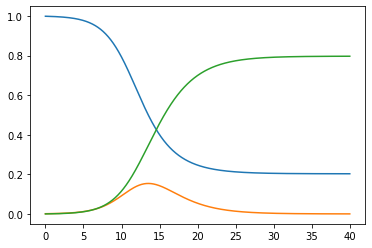

In [7]:
plt.plot(T,S)
plt.plot(T,I)
plt.plot(T,R)
plt.show()

In [8]:
#proportion of the population that has been infected and removed from susceptibility
(1 - I - S)[-1]

0.796907665341952

## Question 3

Import the provided data from a SIR model. Use this to estimate the percentage of recovered at $t=6$

In [9]:
data = pds.read_csv("HW9_example.csv")
data

,time,s,i
0,0.00,9.900000e-01,0.010000
1,0.01,9.893598e-01,0.010620
2,0.02,9.885095e-01,0.011443
3,0.03,9.875084e-01,0.012413
4,0.04,9.865452e-01,0.013346
...,...,...,...
395,3.95,7.618524e-09,0.432510
396,3.96,7.368533e-09,0.431485
397,3.97,7.129865e-09,0.430472
398,3.98,6.852014e-09,0.429255


In [10]:
data = data.to_numpy()

In [11]:
#opted to estimate beta dynamically
def beta(ds,dt,s,i):
    return -(ds/dt)/(s*i)

t=data[-1][0]
dt=1e-3
S, I = data[-1][1:]

S = np.append(S, S + ds(S,I, b=beta(S-data[-2][1],dt,S,I))*dt)
b = beta(S[-1]-S[-2],dt,S[-1],I)
I = np.append(I, I + di(S[-1],I,b)*dt)
t+=dt

while(t < 6):
    S = np.append(S, (S[-1] + ds(S[-1],I[-1],b)*dt))
    I = np.append(I, (I[-1] + di(S[-1],I[-1],b)*dt))
    
    t+=dt
    b = beta(S[-1]-S[-2],dt,S[-1],I[-1])

In [12]:
R = 1 - S - I
R[-1]

0.8433571300095191